<TransferFunction>: sys[716]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          1
---------------------
s^3 + 3 s^2 + 5 s + 1

[-1.3854585+1.56388451j -1.3854585-1.56388451j -0.229083 +0.j        ]


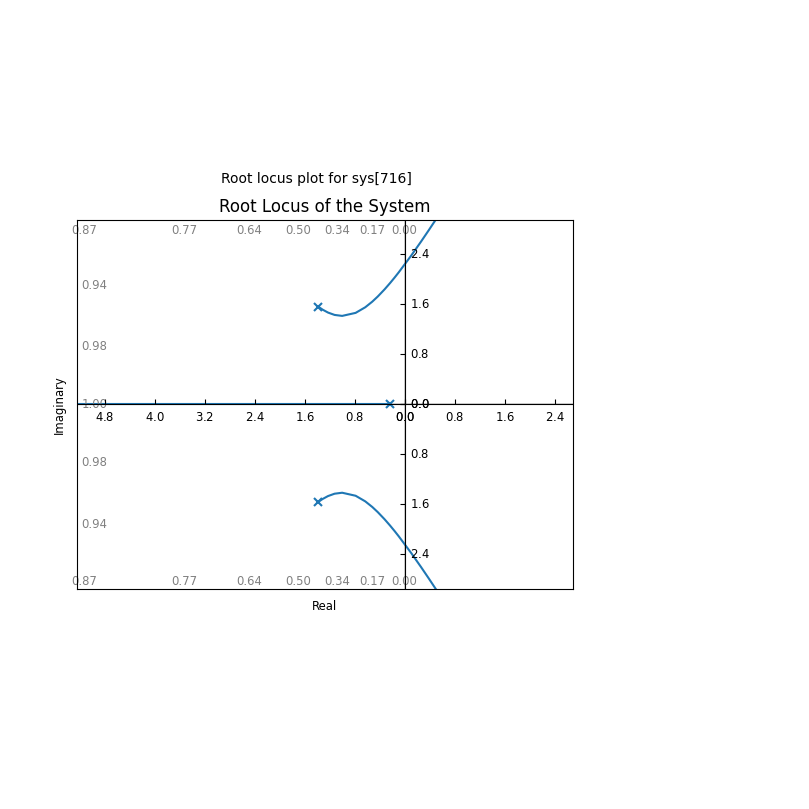

In [226]:
import control as ctrl
num = np.array([1])
den = np.array([1,3,5,1])
plant= ctrl.tf(num,den)
print(plant)
ctrl.root_locus(plant)
print(ctrl.poles(plant))
plt.title("Root Locus of the System")
plt.grid()
plt.show()

In [227]:
s_value = -1.38
G_s = ctrl.evalfr(plant, s_value)
print(f"G(2) = {G_s}")
K=-1/G_s
K

G(2) = (-0.35525594058983856-0j)


(2.814872-0j)

In [239]:
controller = K

closed_loop = ctrl.feedback(controller * plant/(1+controller * plant))

# Find the closed-loop poles
closed_loop_poles = ctrl.poles(closed_loop)
print("Closed-Loop Poles:", closed_loop_poles)

Closed-Loop Poles: [-2.1173613 +0.j         -1.3854585 +1.56388451j -1.3854585 -1.56388451j
 -0.44131935+1.71358461j -0.44131935-1.71358461j -0.229083  +0.j        ]


In [252]:
# Define PID gains
Kp = controller
Ki = Kp*0.23*2
Kd = Kp/(0.23*4)*0.125

# Define PID Controller in Laplace domain: Kp + Ki/s + Kd*s
s = ctrl.TransferFunction.s
pid = Kp + Ki/s + Kd * s

print("PID Controller Transfer Function:")
print(pid)

PID Controller Transfer Function:
<TransferFunction>: sys[881]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.3825 s^2 + 2.815 s + 1.295
----------------------------
             s



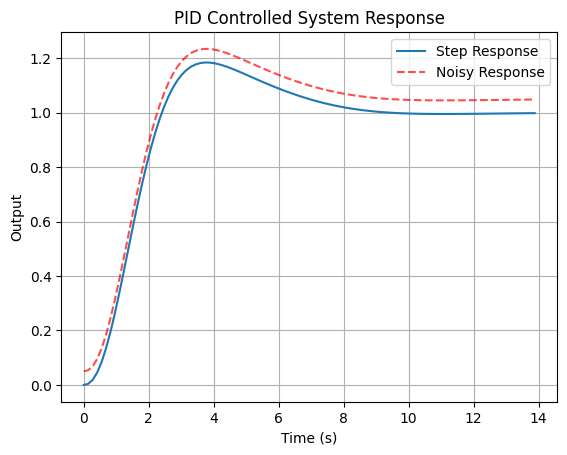

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Closed-loop system (feedback connection)
closed_loop = ctrl.feedback(pid * plant)

# Simulate step response
t, y = ctrl.step_response(closed_loop)
noise_amplitude = 0.05  # Adjust the noise level as needed
noise = noise_amplitude
y_noisy = y + noise

# Plot response
plt.plot(t, y, label="Step Response")
plt.plot(t, y_noisy, label="Noisy Response", linestyle='--', color='r', alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.title("PID Controlled System Response")
plt.legend()
plt.grid()
plt.show()
